## Lab 2: Principal Component Analysis
You can use external libraries for linear algebra operations but you are expected to write your own algorithms.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder

# Exercise 1
Use the  ```Dry_Bean_Dataset.xlsx``` available on the  ```github``` page of the labs.
- Divide your dataset into a train and a test set.
- Preprocess the data by centering the variables and dividing them by their standard deviation.

In [34]:
df = pd.read_excel("../Datasets/Dry_Bean_Dataset.xlsx")

In [35]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [36]:
y = df['Class']
X = df.drop('Class', axis=1)

In [37]:
encoder = OrdinalEncoder()
y=np.array(y)
encoder.fit(y.reshape(-1,1))
y = encoder.transform(y.reshape(-1, 1))
print(y)  

[[5.]
 [5.]
 [5.]
 ...
 [3.]
 [3.]
 [3.]]


In [38]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [39]:
X_mean = Xtrain.mean()
X_std = Xtrain.std()

In [40]:
Xtrain = (Xtrain-X_mean )/X_std

In [41]:
Xtrain.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
8955,-0.257824,-0.282596,-0.175150,-0.255132,0.064660,0.320952,-0.265242,-0.209827,0.915804,0.949374,0.528318,-0.181930,0.129814,-0.194019,-0.218710,-0.094383
6133,-0.081038,0.179917,0.535006,-0.547981,1.932188,1.338852,-0.080831,0.015884,-2.504558,-0.119685,-1.274890,-1.712938,0.588295,-1.141967,-1.633054,-0.681589
9767,-0.092703,-0.058591,-0.007112,-0.025563,0.023153,0.285736,-0.098250,0.001357,-0.616606,0.584512,0.288164,-0.124971,-0.190063,-0.291738,-0.162598,0.464280
13133,-0.517189,-0.630828,-0.592095,-0.512486,-0.326044,-0.046926,-0.519701,-0.565761,-0.589772,0.432701,0.740871,0.246977,0.489342,0.368325,0.209973,0.796092
12075,-0.687207,-0.851590,-0.803315,-0.780181,-0.327666,-0.048641,-0.688669,-0.818934,-1.038588,0.370686,0.657095,0.233612,0.959711,0.594749,0.196400,0.279615


- Write your own algorithm to perform PCA on the variables.

In [ ]:
#Since the intent of these laboratories is for YOU to learn and test the algorithms, we will not provide a "hand-made" version of the algorithm in these solutions (as your code will be commented during the exam).
#We will use instead the sklearn version of PCA. You can check if your results match the provided solution.

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA() #this will keep all the components
#alternatively you can specify the number of components you want to keep by writing 
# pca = PCA(n_components =3)

In [44]:
pca.fit(Xtrain) #this is just a fit of the model to the training set

PCA()

- Using the training set, obtain and plot the eigenvalue spectrum using the log-scale for the y-axis. What number of principal components would you select?

Text(0.5, 1.0, 'Eigenvalues spectrum')

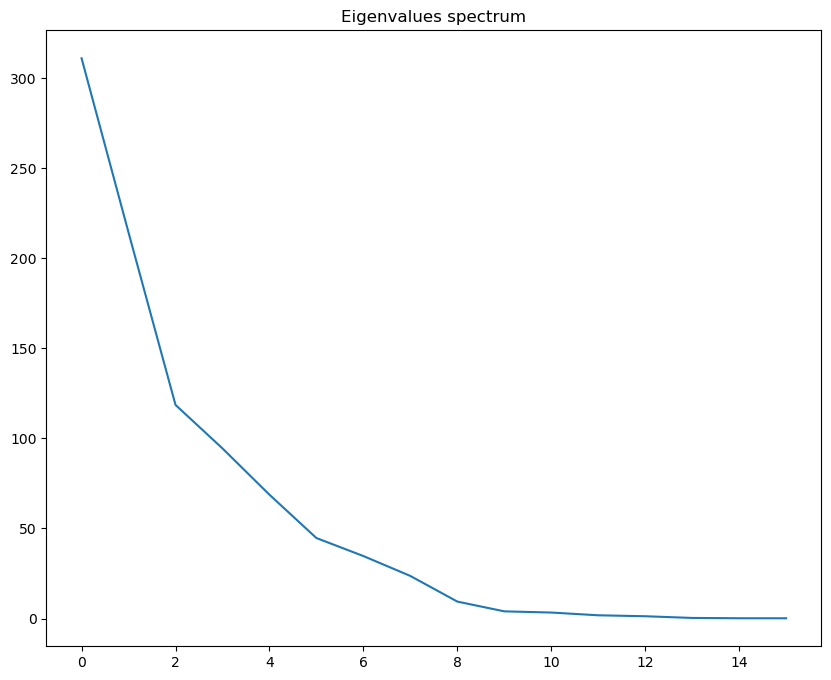

In [45]:
plt.figure(figsize=(10,8))
plt.plot(pca.singular_values_)
plt.title("Eigenvalues spectrum")

Text(0.5, 1.0, 'Log-scale for eigenvalues')

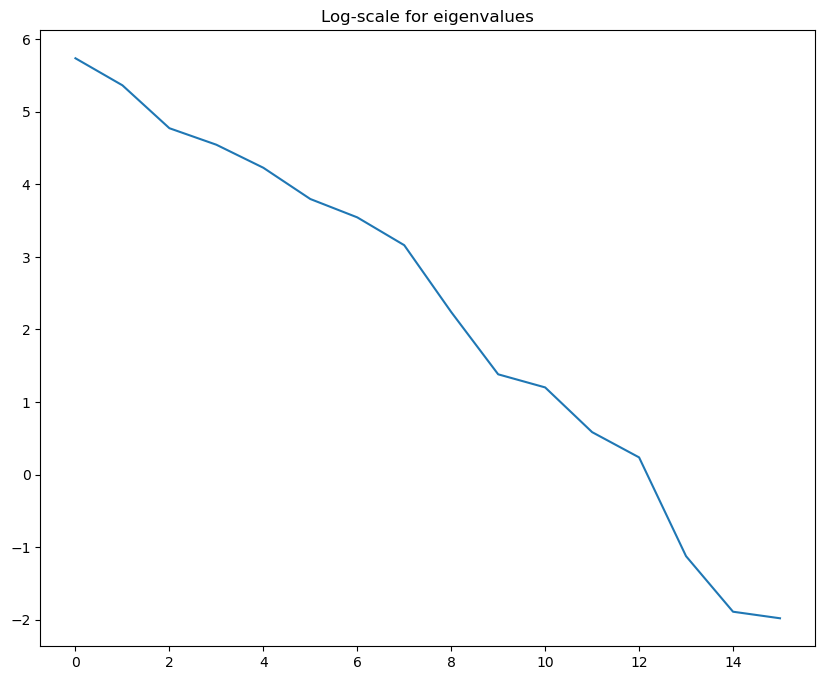

In [46]:
plt.figure(figsize=(10,8))
plt.plot(np.log(pca.singular_values_))
plt.title("Log-scale for eigenvalues")

Text(0.5, 1.0, 'Amount of variance explained by each PC')

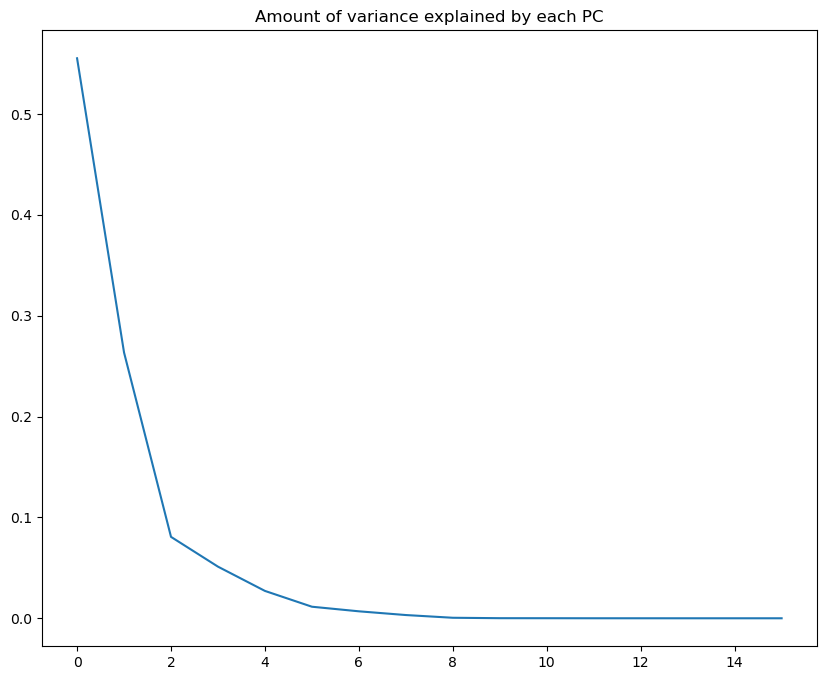

In [47]:
plt.figure(figsize=(10,8))
plt.plot(pca.explained_variance_ratio_)
plt.title("Amount of variance explained by each PC")

- Project the data (training set) in the first two principal components and color by class. Do it also for three principal components. 

In [48]:
X_new = pca.transform(Xtrain)
print(X_new.shape)

#you can also fit the model and apply the dimensionality reduction to the same set by writing
#pca.fit_transform(Xtrain)

(10888, 16)


In [49]:
X_new_3 = X_new[:,:3] #we need at most 3 PCs

In [50]:
ytrain = np.array(ytrain)

In [51]:
data = np.column_stack((X_new_3, ytrain))
print(data.shape)

(10888, 4)


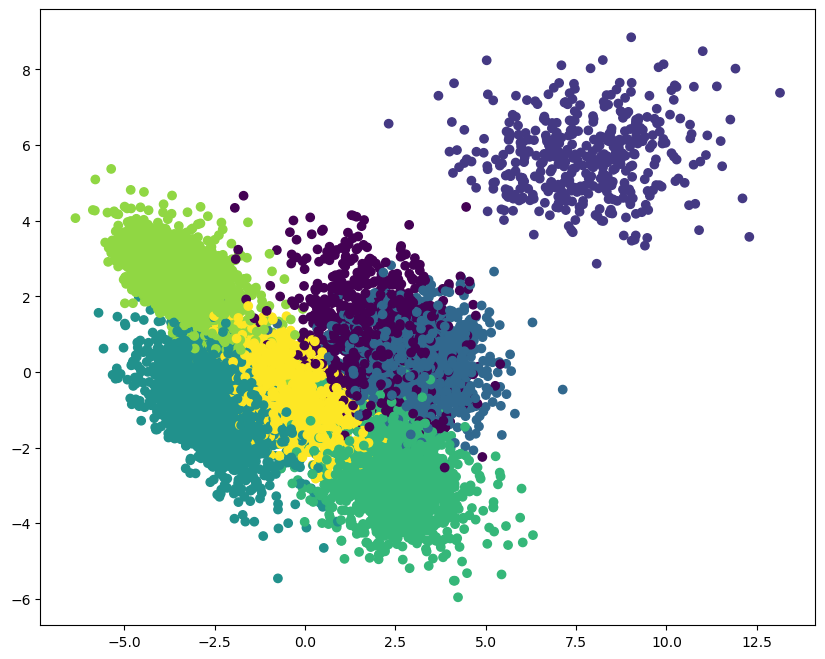

In [52]:
plt.figure(figsize=(10,8))
plt.scatter(data[:,0], data[:,1], c=data[:,3])

Text(0.5, 0, '3rd PC')

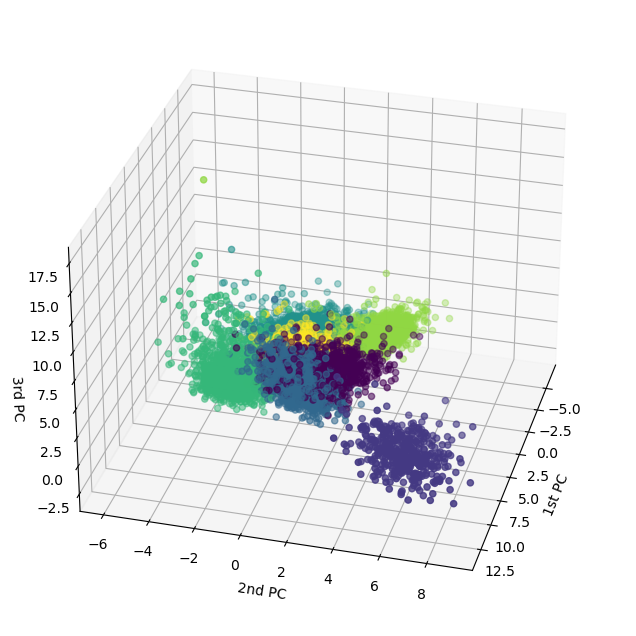

In [53]:
plt.figure(figsize=(10,8))
axes = plt.axes(projection='3d')
axes.scatter3D(data[:,0], data[:,1], data[:,2], c=data[:,3])
axes.view_init(30,15)
axes.set_xlabel('1st PC')
axes.set_ylabel('2nd PC')
axes.set_zlabel('3rd PC')

- For an increasing number of principal components (1 to 16):
- - Apply a multinomial logistic regression to learn a model on the training set (use  ```sklearn.linear_model.LogisticRegression``` ).
- - Transform the test set with the matrix learned from the traning set. Make a prediction with the logistic model learned. 
- - Assess the quality of the predictions and comment on the results. 

In [54]:
Xtest = (Xtest- Xtest.mean())/Xtest.std() #proprocessing of the test set

In [55]:
score = []
for i in range(X_new.shape[1]): #X_new is the PCA transformation of the test set with all components kepts
    lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
    lr.fit(X_new[:,:i+1], ytrain.ravel())

    x_PC = pca.transform(Xtest)
    x_PC = x_PC[:,:i+1] #keep only the needed PCs
    
    yhat = lr.predict(x_PC)
    print(lr.score(x_PC, ytest.ravel()))
    score.append(lr.score(x_PC, ytest.ravel()))

0.6224752111641572
0.8677928755049578
0.877708409842086
0.889092912229159
0.9221446933529196
0.9210429673154609
0.9247153874403232
0.9243481454278369
0.9250826294528094
0.9250826294528094
0.9250826294528094
0.9250826294528094
0.9250826294528094
0.9250826294528094
0.9250826294528094
0.9250826294528094


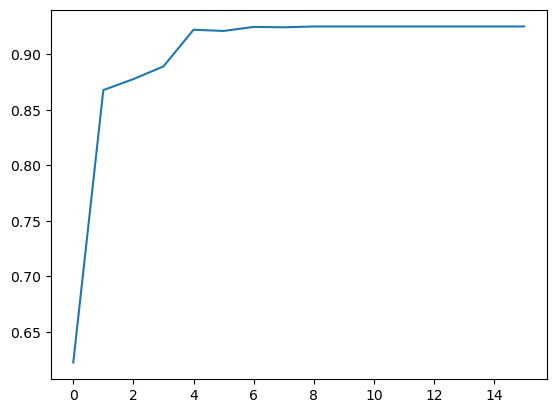

In [56]:
plt.plot(score)
plt.show()

In [57]:
print(f"The maximum values of the accuracy score is reached with {np.argmax(score)} PCs and it is equal to {np.max(score)}")

The maximum values of the accuracy score is reached with 8 PCs and it is equal to 0.9250826294528094


# Exercise 2
Try to apply PCA to the Swiss Roll dataset ($n=1000$) from Lab 1 and plot the projection on the first two principal components. Choose an appropriate color scheme for visualization and comment on your results. 

In [58]:
def swiss_roll(n): #from lab 1
    """
    Parameters:
    n: int
        Number of points to generate"""
    
    data = np.zeros((n,3))
    phi = np.random.uniform(low=1.5*np.pi, high=4.5*np.pi, size=n)
    psi = np.random.uniform(0,10,n)
               
    data[:,0]=phi*np.cos(phi) #x coordinte
    data[:,1]=phi*np.sin(phi) #y coordinate
    data[:,2]=psi #z coordinate
    return data

In [64]:
X = swiss_roll(1000)

In [65]:
#X = (X-np.mean(X)) #or 
X = (X-np.mean(X))/np.std(X) #but it is only necessary to centralize the data in practice

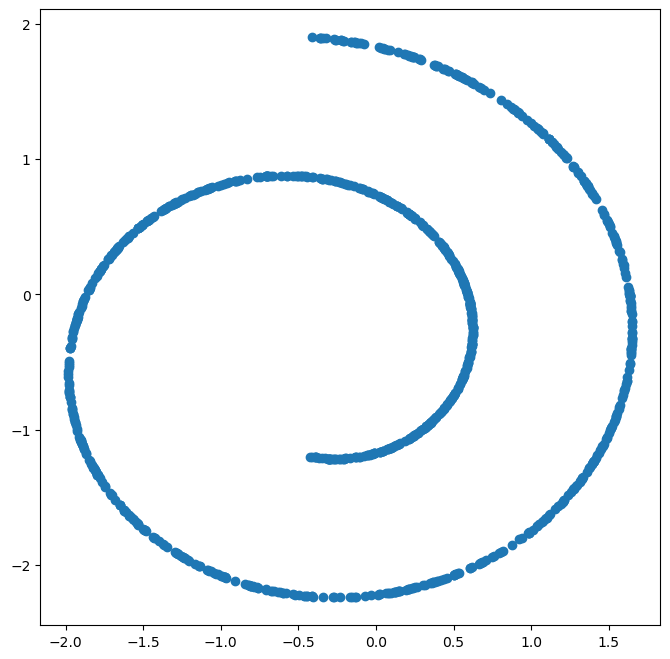

In [66]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1])

In [67]:
pca_swiss = PCA(n_components=2)
X_transformed = pca_swiss.fit_transform(X)

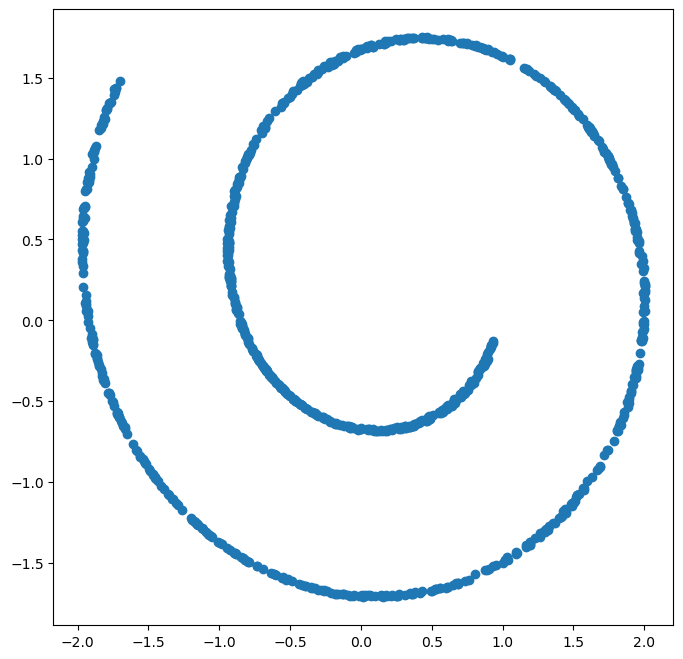

In [68]:
plt.figure(figsize=(8,8))
plt.scatter(X_transformed[:,0], X_transformed[:,1])